**TASK 1**

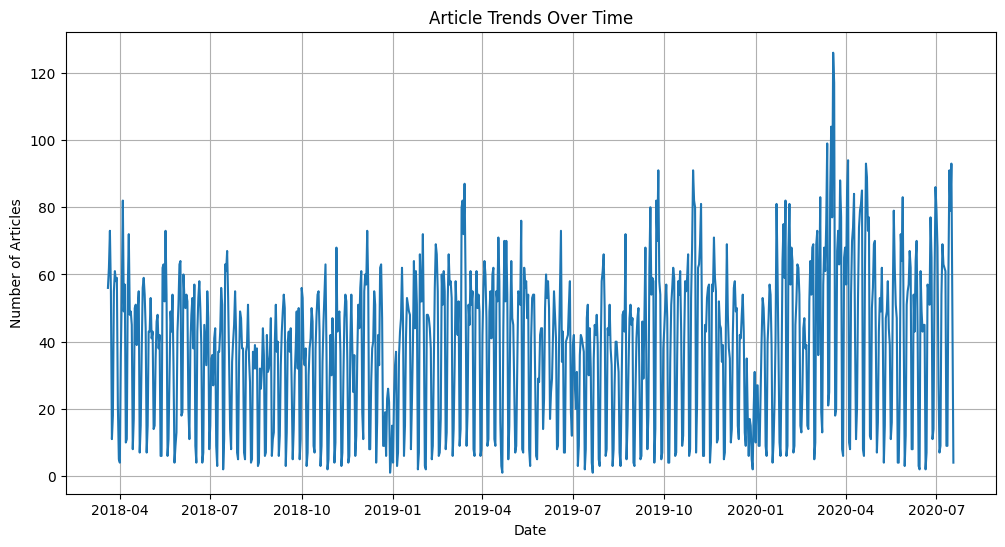

Top Words in Headlines:
s: 13485
to: 12520
u: 7069
in: 6619
on: 4778
for: 4466
of: 3967
as: 3519
china: 3345
says: 2942
with: 2325
trade: 2303
billion: 1770
after: 1727
deal: 1649
new: 1628
ceo: 1535
coronavirus: 1453
over: 1447
trump: 1447

Top Words in Descriptions:
the: 52546
to: 34440
on: 29967
a: 29828
s: 28682
of: 25559
in: 23131
and: 21111
said: 13724
its: 12722
u: 12001
for: 10959
as: 9873
with: 8285
it: 8123
that: 8067
by: 6425
from: 6287
inc: 5823
is: 5610

Missing Data Summary:
Headlines      0
Time           0
Description    0
dtype: int64

Missing Data Percentage:
Headlines      0.0
Time           0.0
Description    0.0
dtype: float64

Unique Articles: 32575


In [ ]:
import pandas as pd
from collections import Counter
import re
import matplotlib.pyplot as plt

# Load Dataset
file_path = '/content/reuters_headlines.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Step 1: Dataset Overview
# Number of unique articles
unique_articles = data['Headlines'].nunique()

# Check for missing data
missing_data = data.isnull().sum()
missing_percentage = (missing_data / len(data)) * 100

# Step 2: Trends Over Time
# Convert the Time column to a datetime format
data['Time'] = pd.to_datetime(data['Time'], errors='coerce')

# Group articles by date
article_trends = data.groupby(data['Time'].dt.date).size()

# Plot Trends
plt.figure(figsize=(12, 6))
article_trends.plot()
plt.title("Article Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.grid()
plt.show()

# Step 3: Text Patterns (Headlines and Descriptions)
def extract_word_frequencies(column, top_n=20):
    text = " ".join(column.dropna().astype(str)).lower()
    words = re.findall(r'\b\w+\b', text)
    return Counter(words).most_common(top_n)

headline_word_freq = extract_word_frequencies(data['Headlines'])
description_word_freq = extract_word_frequencies(data['Description'])

# Display Top Words in Headlines and Descriptions
print("Top Words in Headlines:")
for word, freq in headline_word_freq:
    print(f"{word}: {freq}")

print("\nTop Words in Descriptions:")
for word, freq in description_word_freq:
    print(f"{word}: {freq}")

# Summary of Missing Data
print("\nMissing Data Summary:")
print(missing_data)

print("\nMissing Data Percentage:")
print(missing_percentage)

# Display Unique Articles Count
print(f"\nUnique Articles: {unique_articles}")


**TASK 2**

In [ ]:
pip install spacy


In [ ]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 78.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import pandas as pd
import spacy

# Load SpaCy model
nlp = spacy.load("en_core_web_sm")


In [ ]:
df = pd.read_csv("/content/reuters_headlines.csv")

In [ ]:
def extract_company_names(text):
    """
    Extract company names using SpaCy's named entity recognition (NER).
    """
    doc = nlp(text)
    companies = [ent.text for ent in doc.ents if ent.label_ == "ORG"]  # Filter for organizations
    return companies

In [ ]:
# Apply to dataset
df["Extracted_Company_Names_Headlines"] = df["Headlines"].apply(extract_company_names)
df["Extracted_Company_Names_Description"] = df["Description"].apply(extract_company_names)

# Combine company names from Headlines and Descriptions
df["Combined_Company_Names"] = df.apply(
    lambda row: list(set(row["Extracted_Company_Names_Headlines"] + row["Extracted_Company_Names_Description"])),
    axis=1
)

# Display results
print(df[["Headlines", "Time", "Description", "Combined_Company_Names"]])

# Save to CSV
df.to_csv("extracted_company_names.csv", index=False)
print("Company name extraction complete. Results saved to 'extracted_company_names.csv'.")

                                               Headlines         Time  \
0      TikTok considers London and other locations fo...  Jul 18 2020   
1      Disney cuts ad spending on Facebook amid growi...  Jul 18 2020   
2      Trail of missing Wirecard executive leads to B...  Jul 18 2020   
3      Twitter says attackers downloaded data from up...  Jul 18 2020   
4      U.S. Republicans seek liability protections as...  Jul 17 2020   
...                                                  ...          ...   
32765  Malaysia says never hired British data firm at...  Mar 20 2018   
32766  Prosecutors search Volkswagen headquarters in ...  Mar 20 2018   
32767   McDonald's sets greenhouse gas reduction targets  Mar 20 2018   
32768  Pratt & Whitney to deliver spare A320neo engin...  Mar 20 2018   
32769  UK will always consider ways to improve data l...  Mar 20 2018   

                                             Description  \
0      TikTok has been in discussions with the UK gov...   
1  

In [ ]:
df = pd.read_csv("/content/extracted_company_names.csv")

In [ ]:
# Define filtering and normalization rules
exclude_terms = ["Congress", "Government", "WSJ"]  # Non-company terms
normalization_map = {
    "the Wall Street Journal": "Dow Jones",
    "Facebook Inc": "Meta Platforms",
}  # Normalize company names

def filter_and_normalize(companies):
    """
    Filter and normalize extracted company names.
    """
    # Remove excluded terms
    filtered = [c for c in companies if c not in exclude_terms]
    # Normalize company names
    normalized = [normalization_map.get(c, c) for c in filtered]
    return normalized

# Apply the filtering and normalization process
df["Filtered_Company_Names"] = df["Combined_Company_Names"].apply(
    lambda x: filter_and_normalize(eval(x))  # Convert string representation of list to actual list
)

# Display refined dataset, including `Description` and `Time`
refined_data = df[["Headlines", "Description", "Time", "Filtered_Company_Names"]]
print(df)

# Save the refined dataset with all required columns
df.to_csv("refined_company_names_with_details.csv", index=False)
print("Refined company names with full details saved to 'refined_company_names_with_details.csv'.")



                                               Headlines         Time  \
0      TikTok considers London and other locations fo...  Jul 18 2020   
1      Disney cuts ad spending on Facebook amid growi...  Jul 18 2020   
2      Trail of missing Wirecard executive leads to B...  Jul 18 2020   
3      Twitter says attackers downloaded data from up...  Jul 18 2020   
4      U.S. Republicans seek liability protections as...  Jul 17 2020   
...                                                  ...          ...   
32765  Malaysia says never hired British data firm at...  Mar 20 2018   
32766  Prosecutors search Volkswagen headquarters in ...  Mar 20 2018   
32767   McDonald's sets greenhouse gas reduction targets  Mar 20 2018   
32768  Pratt & Whitney to deliver spare A320neo engin...  Mar 20 2018   
32769  UK will always consider ways to improve data l...  Mar 20 2018   

                                             Description  \
0      TikTok has been in discussions with the UK gov...   
1  

In [ ]:
!pip install requests beautifulsoup4


In [ ]:
# Import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Function to scrape a single page
def scrape_page(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find the table containing stock data
    table = soup.find('table')  # Adjust based on website structure
    rows = table.find_all('tr')[1:]  # Skip the header row

    data = []
    for row in rows:
        cols = row.find_all('td')
        if len(cols) > 0:  # Ensure row has data
            Symbol = cols[0].text.strip()
            Company = cols[1].text.strip()
            price = cols[2].text.strip()
            pe_ratio = cols[3].text.strip()
            market_cap = cols[4].text.strip()
            data.append([Symbol, Company, price, pe_ratio, market_cap])
    return data

# Function to scrape all pages
def scrape_all_pages(base_url, total_pages):
    all_data = []
    for page in range(1, total_pages + 1):
        print(f"Scraping page {page}...")
        url = f"{base_url}?page={page}"
        page_data = scrape_page(url)
        all_data.extend(page_data)
    return all_data

# Define the base URL and number of pages to scrape
base_url = "https://stockanalysis.com/stocks/screener/"
total_pages = 1700  # Adjust this based on the actual number of pages

# Scrape data from all pages
data = scrape_all_pages(base_url, total_pages)

# Convert the data into a DataFrame
columns = ["Company", "Symbol", "Stock Price", "P/E Ratio", "Market Cap"]
df = pd.DataFrame(data, columns=columns)

# Save the data to a CSV file
df.to_csv('stock_data.csv', index=False)
print("Data has been saved to 'stock_data.csv'.")

# Display the DataFrame
df.head()


Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Scraping page 15...
Scraping page 16...
Scraping page 17...
Scraping page 18...
Scraping page 19...
Scraping page 20...
Scraping page 21...
Scraping page 22...
Scraping page 23...
Scraping page 24...
Scraping page 25...
Scraping page 26...
Scraping page 27...
Scraping page 28...
Scraping page 29...
Scraping page 30...
Scraping page 31...
Scraping page 32...
Scraping page 33...
Scraping page 34...
Scraping page 35...
Scraping page 36...
Scraping page 37...
Scraping page 38...
Scraping page 39...
Scraping page 40...
Scraping page 41...
Scraping page 42...
Scraping page 43...
Scraping page 44...
Scraping page 45...
Scraping page 46...
Scraping page 47...
Scraping page 48...
Scraping page 49...
Scraping page 50...
Scraping 

,Company,Symbol,Stock Price,P/E Ratio,Market Cap
0,NVDA,NVIDIA Corporation,"3,591.46B",146.65,4.13%
1,AAPL,Apple Inc.,"3,343.22B",222.32,-0.14%
2,MSFT,Microsoft Corporation,"3,309.86B",445.18,3.89%
3,AMZN,"Amazon.com, Inc.","2,461.14B",234.06,1.45%
4,GOOGL,Alphabet Inc.,"2,448.08B",199.99,0.98%


In [ ]:
import pandas as pd

# Load the DataFrame
df = pd.read_csv('/content/stock_data.csv')

# Rename the columns
df.rename(columns={"Symbol": "Company", "Company": "Symbol"}, inplace=True)

# Save the updated DataFrame back to a CSV
df.to_csv('/content/swapped_columns_data.csv', index=False)

print("Column names have been swapped and saved to 'swapped_columns_data.csv'.")


Column names have been swapped and saved to 'swapped_columns_data.csv'.


In [ ]:
import pandas as pd

# Load the CSV file
file_name = 'refined_company_names_with_details.csv'
df = pd.read_csv(file_name)

# Drop the specified columns
columns_to_drop = [
    'Extracted_Company_Names_Headlines',
    'Extracted_Company_Names_Description',
    'Combined_Company_Names'
]
df.drop(columns=columns_to_drop, inplace=True)
# Rename the column
df.rename(columns={'Filtered_Company_Names': 'company'}, inplace=True)

# Save the updated DataFrame to a new CSV file
df.to_csv('updated_refined_company_names.csv', index=False)

print("Specified columns have been dropped, the column name has been changed, and the updated file is saved as 'updated_refined_company_names.csv'.")


Specified columns have been dropped, the column name has been changed, and the updated file is saved as 'updated_refined_company_names.csv'.


In [ ]:
!pip install fuzzywuzzy

In [7]:
import pandas as pd

# Assuming you want to get unique company names from a DataFrame called 'df'
# Load the file
df = pd.read_csv('/content/file1_with_mapped_companies.csv')  #
df = pd.read_csv(file_path)

# Assuming the company names are in the 'company' column
unique_companies = df['Company'].unique().tolist()

# Clean the unique company names list:
unique_companies_cleaned = [company for company in unique_companies if str(company).strip() and str(company) != "[]"]

# Display the cleaned list
unique_companies_cleaned

['NVIDIA Corporation',
 'Meta Platforms, Inc.',
 'Mastercard Incorporated',
 'Tesla, Inc.',
 nan,
 'Taiwan Semiconductor Manufacturing Company Limited',
 'Alphabet Inc.',
 'Visa Inc.',
 'Broadcom Inc.',
 'JPMorgan Chase & Co.',
 'UnitedHealth Group Incorporated',
 'Microsoft Corporation',
 'Berkshire Hathaway Inc.',
 'Oracle Corporation',
 'Eli Lilly and Company',
 'Amazon.com, Inc.',
 'Apple Inc.',
 'Exxon Mobil Corporation',
 'Walmart Inc.']

In [8]:
# Load the file (if not already loaded)
df = pd.read_csv('/content/swapped_columns_data.csv')  # Replace with your actual file path
df = pd.read_csv(file_path)

# Assuming the company names are in the 'company' column
unique_companies = df['Company'].unique().tolist()

# Clean the unique company names list:
unique_companies_cleaned = [company for company in unique_companies if str(company).strip() and str(company) != "[]"]  # Convert company to str before calling strip()

# Display the cleaned list
unique_companies_cleaned

['NVIDIA Corporation',
 'Meta Platforms, Inc.',
 'Mastercard Incorporated',
 'Tesla, Inc.',
 nan,
 'Taiwan Semiconductor Manufacturing Company Limited',
 'Alphabet Inc.',
 'Visa Inc.',
 'Broadcom Inc.',
 'JPMorgan Chase & Co.',
 'UnitedHealth Group Incorporated',
 'Microsoft Corporation',
 'Berkshire Hathaway Inc.',
 'Oracle Corporation',
 'Eli Lilly and Company',
 'Amazon.com, Inc.',
 'Apple Inc.',
 'Exxon Mobil Corporation',
 'Walmart Inc.']

In [9]:
df = pd.read_csv("/content/Dataset_with_Symbols_Added.csv")

In [17]:
df.head(10)

,Unnamed: 0,Headlines,Description,Symbol
0,0,TikTok considers London and other locations fo...,TikTok has been in discussions with the UK gov...,NVDA
1,1,Disney cuts ad spending on Facebook amid growi...,Walt Disney has become the latest company to ...,META
2,2,Trail of missing Wirecard executive leads to B...,Former Wirecard chief operating officer Jan M...,MA
3,3,Twitter says attackers downloaded data from up...,Twitter Inc said on Saturday that hackers were...,TSLA
4,4,U.S. Republicans seek liability protections as...,A battle in the U.S. Congress over a new coron...,NaN
5,5,Wall Street Week Ahead: Fund managers navigate...,Investors are searching for bargains in the wo...,TSLA
6,6,Take Five: Hoping for that V-shape in earnings,We knew Q2 earnings would be dire but the hope...,NaN
7,7,Evictions nearly back to pre-pandemic levels i...,Landlords in some areas of the United States a...,TSM
8,8,Google bans ads on coronavirus conspiracy theo...,Alphabet Inc's Google said on Friday it would ...,GOOGL
9,9,Google bans ads on coronavirus conspiracy theo...,Alphabet Inc's Google said on Friday it would ...,GOOG


In [3]:
import pandas as pd
df = pd.read_csv("/content/Dataset_with_Symbols_Added.csv")
df.shape
df.columns

Index(['Unnamed: 0', 'Headlines', 'Time', 'Description', 'Matched_Company',
       'Symbol'],
      dtype='object')

In [30]:
df.drop(['Matched_Company'], axis=1, inplace=True)

In [31]:
df.to_csv('Updated_Dataset_with_Symbols.csv', index=False)

In [33]:
df.drop_duplicates(inplace=True)

In [35]:
df.shape

(35223, 5)

**Task 3**

In [7]:
pip install yfinance alpha_vantage pandas

In [8]:
import yfinance as yf
import pandas as pd

# Load the dataset
file_path = 'Dataset_with_Symbols_Added.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Initialize a results list
results = []

# Iterate over each stock ticker in the dataset
for ticker in df['Symbol'].dropna().unique():
    try:
        # Fetch historical price data
        stock = yf.Ticker(ticker)
        hist_data = stock.history(period="1y")  # Past year data

        # Get close prices and calculate the average close price
        avg_close_price = hist_data['Close'].mean()

        # Fetch key financial metrics
        market_cap = stock.info.get('marketCap', 'N/A')
        pe_ratio = stock.info.get('trailingPE', 'N/A')

        # Append results
        results.append({
            'Symbol': ticker,
            'Average_Close_Price': avg_close_price,
            'Market_Capitalization': market_cap,
            'P/E_Ratio': pe_ratio
        })
    except Exception as e:
        # Handle errors for invalid tickers or API issues
        results.append({
            'Symbol': ticker,
            'Average_Close_Price': 'Error',
            'Market_Capitalization': 'Error',
            'P/E_Ratio': 'Error',
            'Error': str(e)
        })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Save the results to a CSV file
results_df.to_csv('enriched_stock_data.csv', index=False)
print("Data retrieval complete. Results saved to 'enriched_stock_data.csv'.")


ERROR:yfinance:$BRK.A: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
ERROR:yfinance:$BRK.B: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")


Data retrieval complete. Results saved to 'enriched_stock_data.csv'.


In [10]:
import yfinance as yf
import pandas as pd
df = pd.read_csv("/content/enriched_stock_data.csv")
# List of stock symbols
symbols = df['Symbol'].tolist()

# Initialize an empty DataFrame to store historical data
all_data = pd.DataFrame()

for symbol in symbols:
    # Fetch historical data for the past year
    stock_data = yf.download(symbol, start="2022-01-01", end="2023-01-01")
    stock_data['Symbol'] = symbol  # Add symbol column for identification
    all_data = pd.concat([all_data, stock_data])

# Save the historical data
all_data.reset_index(inplace=True)
all_data.to_csv('historical_stock_data.csv', index=False)
print("Historical data saved as 'historical_stock_data.csv'")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK.A']: YFTzMissingError('$%ticker%: possibly deli

Historical data saved as 'historical_stock_data.csv'


In [12]:
df =pd.read_csv("/content/historical_stock_data.csv")

In [13]:
# Drop the first row if it contains repeated headers
historical_data_cleaned = df.iloc[1:]

# Reshape the dataset into a long format
long_data = pd.melt(
    historical_data_cleaned,
    id_vars=['Date'],  # Keep Date as is
    value_vars=[col for col in df.columns if 'Close' in col and col != 'Date'],
    var_name='Stock',
    value_name='Close_Price'
)

# Extract Symbol information from the column names
long_data['Symbol'] = long_data['Stock'].str.extract(r'Close(?:\.(.+))?')
long_data['Symbol'] = long_data['Symbol'].fillna('NVDA')  # Assume "Close" refers to NVDA

# Drop unnecessary columns and clean data
long_data = long_data[['Date', 'Symbol', 'Close_Price']]
long_data['Date'] = pd.to_datetime(long_data['Date'])  # Convert Date to datetime
long_data = long_data.dropna()  # Drop rows with missing data

# Save the cleaned dataset
cleaned_file_path = 'cleaned_historical_stock_data.csv'
long_data.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved as '{cleaned_file_path}'.")


Cleaned dataset saved as 'cleaned_historical_stock_data.csv'.


<ipython-input-13-406d2803303b>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_data['Date'] = pd.to_datetime(long_data['Date'])  # Convert Date to datetime


**Task 4**

In [22]:
import yfinance as yf
import pandas as pd

# Fetch actual stock prices for NVDA
ticker = "NVDA"
start_date = "2023-01-01"  # Adjust this to match your forecast period
end_date = "2023-01-31"    # Adjust to cover the entire forecast period
actual_data = yf.download(ticker, start=start_date, end=end_date)

# Save as CSV
actual_data.reset_index(inplace=True)
actual_data[['Date', 'Close']].to_csv('actual_data.csv', index=False)
print("Actual data saved as 'actual_data.csv'")


[*********************100%***********************]  1 of 1 completed

Actual data saved as 'actual_data.csv'


**Task 4**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 39s 74ms/step - loss: 0.0152 - val_loss: 3.8024e-04
Epoch 2/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 20s 71ms/step - loss: 0.0028 - val_loss: 3.9768e-04
Epoch 3/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - loss: 0.0025 - val_loss: 5.1780e-04
Epoch 4/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - loss: 0.0027 - val_loss: 4.0508e-04
Epoch 5/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 16s 73ms/step - loss: 0.0021 - val_loss: 3.1810e-04
Epoch 6/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - loss: 0.0017 - val_loss: 2.9075e-04
Epoch 7/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 18s 71ms/step - loss: 0.0014 - val_loss: 3.1453e-04
Epoch 8/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 21s 71ms/step - loss: 0.0013 - val_loss: 4.1371e-04
Epoch 9/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 20s 70ms/step - loss: 0.0014 - val_loss: 2.4220e-04
Epoch 10/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 21s 71ms/step - loss: 0.0013 - val_loss: 3.6498e-04
Epoch 11/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 20s 71ms/step - loss: 0.0016 - val_los

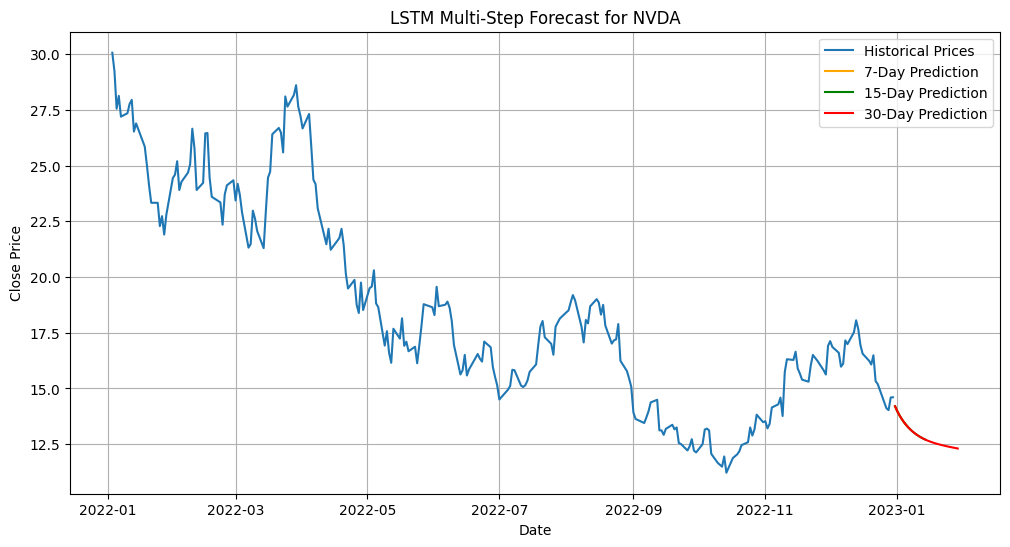

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Load and preprocess the data
file_path = '/content/cleaned_historical_stock_data.csv'  # Update with your file path
historical_data = pd.read_csv(file_path)
historical_data['Date'] = pd.to_datetime(historical_data['Date'])
historical_data.set_index('Date', inplace=True)

# Extract close prices and normalize
close_prices = historical_data['Close_Price'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_data = scaler.fit_transform(close_prices)

# Prepare data for LSTM
sequence_length = 75
X, y = [], []
for i in range(sequence_length, len(normalized_data)):
    X.append(normalized_data[i-sequence_length:i, 0])  # Last 60 days
    y.append(normalized_data[i, 0])  # Next day's price

X, y = np.array(X), np.array(y)

# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape input for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=25),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=15, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Generate predictions for 7, 15, and 30 days
future_days = 30
last_sequence = normalized_data[-sequence_length:]
predictions = []

for _ in range(future_days):
    input_seq = last_sequence.reshape(1, sequence_length, 1)
    pred = model.predict(input_seq)
    predictions.append(pred[0, 0])
    last_sequence = np.append(last_sequence[1:], pred, axis=0)

# Inverse transform predictions to original scale
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Create a DataFrame for the forecast
future_dates = pd.date_range(start=historical_data.index[-1] + pd.Timedelta(days=1), periods=future_days)
forecast = pd.DataFrame({'Date': future_dates, 'Predicted Close Price': predictions.flatten()})

# Add columns for 7-day, 15-day, and 30-day forecasts
forecast['7-Day Prediction'] = forecast['Predicted Close Price'].iloc[:7].tolist() + [None] * (future_days - 7)
forecast['15-Day Prediction'] = forecast['Predicted Close Price'].iloc[:15].tolist() + [None] * (future_days - 15)
forecast['30-Day Prediction'] = forecast['Predicted Close Price']

# Save forecast to a CSV file
forecast.to_csv('/content/lstm_forecast_7_15_30.csv', index=False)
print("Forecast saved as 'lstm_forecast_7_15_30.csv'")

# Plot the predictions alongside historical data
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['Close_Price'], label='Historical Prices')
plt.plot(dates[:7], future_predictions[0], label='7-Day Prediction', color='orange')
plt.plot(dates[:15], future_predictions[1], label='15-Day Prediction', color='green')
plt.plot(dates[:30], future_predictions[2], label='30-Day Prediction', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('LSTM Multi-Step Forecast for NVDA')
plt.legend()
plt.grid()
plt.show()


In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predictions and true values for evaluation (e.g., test data)
y_pred = model.predict(X_test)  # Predicted values
y_pred = y_pred.flatten()  # Flatten predictions
y_true = y_test  # Actual values

# Inverse transform the normalized data back to the original scale
y_pred_rescaled = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_true_rescaled = scaler.inverse_transform(y_true.reshape(-1, 1)).flatten()

# Calculate metrics
mae = mean_absolute_error(y_true_rescaled, y_pred_rescaled)
rmse = np.sqrt(mean_squared_error(y_true_rescaled, y_pred_rescaled))
r2 = r2_score(y_true_rescaled, y_pred_rescaled)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step
Mean Absolute Error (MAE): 2.66
Root Mean Squared Error (RMSE): 5.60
R² Score: 0.98


**Task 5**

In [35]:
pip install nltk

In [37]:
import re

# Define a custom function for text preprocessing without NLTK
def preprocess_text_alternative(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters using regex
    text = re.sub(r'[^\w\s]', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Preprocess the `Description` column
news_data['Cleaned_Description'] = news_data['Description'].fillna('').apply(preprocess_text_alternative)

# Preprocess the `Headlines` column (optional)
news_data['Cleaned_Headlines'] = news_data['Headlines'].fillna('').apply(preprocess_text_alternative)

# Display a sample of the cleaned data
news_data[['Description', 'Cleaned_Description', 'Headlines', 'Cleaned_Headlines']].head()



,Description,Cleaned_Description,Headlines,Cleaned_Headlines
0,TikTok has been in discussions with the UK gov...,tiktok has been in discussions with the uk gov...,TikTok considers London and other locations fo...,tiktok considers london and other locations fo...
1,Walt Disney has become the latest company to ...,walt disney has become the latest company to s...,Disney cuts ad spending on Facebook amid growi...,disney cuts ad spending on facebook amid growi...
2,Former Wirecard chief operating officer Jan M...,former wirecard chief operating officer jan ma...,Trail of missing Wirecard executive leads to B...,trail of missing wirecard executive leads to b...
3,Twitter Inc said on Saturday that hackers were...,twitter inc said on saturday that hackers were...,Twitter says attackers downloaded data from up...,twitter says attackers downloaded data from up...
4,A battle in the U.S. Congress over a new coron...,a battle in the us congress over a new coronav...,U.S. Republicans seek liability protections as...,us republicans seek liability protections as c...


In [39]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import nltk
nltk.download('vader_lexicon')

import re


# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis on the `Cleaned_Description` column
news_data['Sentiment_Score'] = news_data['Cleaned_Description'].apply(lambda text: sia.polarity_scores(text)['compound'])

# Categorize sentiment based on compound scores
def categorize_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

news_data['Sentiment_Category'] = news_data['Sentiment_Score'].apply(categorize_sentiment)

# Display a sample of the sentiment analysis results
news_data[['Cleaned_Description', 'Sentiment_Score', 'Sentiment_Category']].head()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,Cleaned_Description,Sentiment_Score,Sentiment_Category
0,tiktok has been in discussions with the uk gov...,0.0258,Neutral
1,walt disney has become the latest company to s...,-0.8360,Negative
2,former wirecard chief operating officer jan ma...,-0.4767,Negative
3,twitter inc said on saturday that hackers were...,0.0000,Neutral
4,a battle in the us congress over a new coronav...,-0.2732,Negative


In [42]:
print(news_data.columns)



Index(['Unnamed: 0', 'Headlines', 'Time', 'Description', 'Matched_Company',
       'Symbol', 'Cleaned_Description', 'Cleaned_Headlines', 'Sentiment_Score',
       'Sentiment_Category'],
      dtype='object')


In [43]:
news_data['Sentiment_Category'] = news_data['Sentiment_Score'].apply(
    lambda score: 'Positive' if score > 0.05 else 'Negative' if score < -0.05 else 'Neutral'
)


In [44]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
news_data['Sentiment_Score'] = news_data['Cleaned_Description'].apply(
    lambda text: sia.polarity_scores(text)['compound']
)
news_data['Sentiment_Category'] = news_data['Sentiment_Score'].apply(
    lambda score: 'Positive' if score > 0.05 else 'Negative' if score < -0.05 else 'Neutral'
)


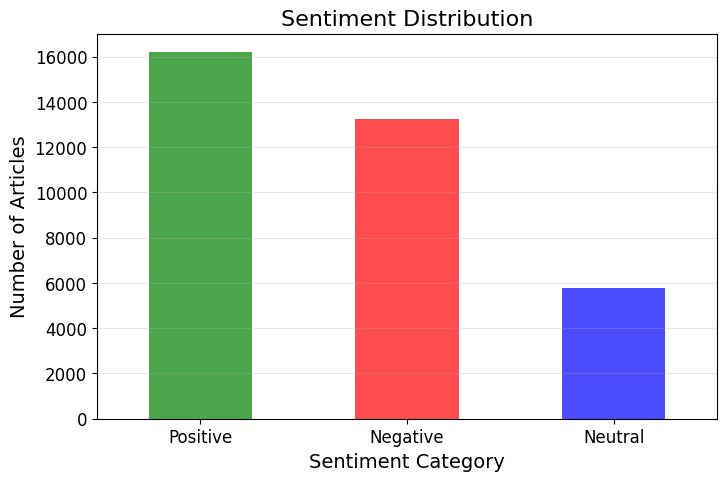

In [45]:
sentiment_counts = news_data['Sentiment_Category'].value_counts()

plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'], alpha=0.7)
plt.title('Sentiment Distribution', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=14)
plt.ylabel('Number of Articles', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()


In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Extract keywords using TF-IDF
vectorizer = TfidfVectorizer(max_features=20, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(news_data['Cleaned_Description'])

# Get top keywords
keywords = vectorizer.get_feature_names_out()
news_data['Keywords'] = tfidf_matrix.toarray().tolist()

# Display keywords
print("Top Keywords:", keywords)




Top Keywords: ['billion' 'chief' 'china' 'company' 'coronavirus' 'executive' 'friday'
 'group' 'monday' 'new' 'oil' 'president' 'said' 'states' 'thursday'
 'trade' 'tuesday' 'united' 'wednesday' 'year']


In [52]:
from sklearn.decomposition import LatentDirichletAllocation

# Apply LDA for topic modeling
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # 5 topics
lda_matrix = lda.fit_transform(tfidf_matrix)

# Assign the dominant topic to each article
news_data['Topic'] = lda_matrix.argmax(axis=1)

# Display the dataset with Keywords and Topics
news_data[['Cleaned_Description', 'Keywords', 'Topic']].head()


,Cleaned_Description,Keywords,Topic
0,tiktok has been in discussions with the uk gov...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
1,walt disney has become the latest company to s...,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3
2,former wirecard chief operating officer jan ma...,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
3,twitter inc said on saturday that hackers were...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
4,a battle in the us congress over a new coronav...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6977135928278...",3


In [53]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon (if running locally)
nltk.download('vader_lexicon')

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Calculate sentiment scores
news_data['Sentiment_Score'] = news_data['Cleaned_Description'].apply(lambda text: sia.polarity_scores(text)['compound'])

# Categorize sentiment
news_data['Sentiment_Category'] = news_data['Sentiment_Score'].apply(
    lambda score: 'Positive' if score > 0.05 else 'Negative' if score < -0.05 else 'Neutral'
)

# Display the sentiment analysis results
news_data[['Cleaned_Description', 'Sentiment_Score', 'Sentiment_Category']].head()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Cleaned_Description,Sentiment_Score,Sentiment_Category
0,tiktok has been in discussions with the uk gov...,0.0258,Neutral
1,walt disney has become the latest company to s...,-0.8360,Negative
2,former wirecard chief operating officer jan ma...,-0.4767,Negative
3,twitter inc said on saturday that hackers were...,0.0000,Neutral
4,a battle in the us congress over a new coronav...,-0.2732,Negative


In [54]:
df = pd.read_csv("/content/Dataset_with_Symbols_Added.csv")
# Step 1: Drop rows where 'Symbol' is missing
df = df.dropna(subset=['Symbol']).reset_index(drop=True)

# Step 2: Convert 'Time' column to datetime format
df['Time'] = pd.to_datetime(news_data['Time'], format='%b %d %Y', errors='coerce')

# Step 3: Check for any invalid datetime conversions
invalid_dates = df[news_data['Time'].isnull()]
if not invalid_dates.empty:
    print("Invalid dates found:")
    print(invalid_dates)

# Display cleaned dataset structure
print(df.info())
df.head()



<ipython-input-54-a297af69d668>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  invalid_dates = df[news_data['Time'].isnull()]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28958 entries, 0 to 28957
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       28958 non-null  int64         
 1   Headlines        28958 non-null  object        
 2   Time             28958 non-null  datetime64[ns]
 3   Description      28958 non-null  object        
 4   Matched_Company  28958 non-null  object        
 5   Symbol           28958 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.3+ MB
None


,Unnamed: 0,Headlines,Time,Description,Matched_Company,Symbol
0,0,TikTok considers London and other locations fo...,2020-07-18,TikTok has been in discussions with the UK gov...,NVIDIA Corporation,NVDA
1,1,Disney cuts ad spending on Facebook amid growi...,2020-07-18,Walt Disney has become the latest company to ...,"Meta Platforms, Inc.",META
2,2,Trail of missing Wirecard executive leads to B...,2020-07-18,Former Wirecard chief operating officer Jan M...,Mastercard Incorporated,MA
3,3,Twitter says attackers downloaded data from up...,2020-07-18,Twitter Inc said on Saturday that hackers were...,"Tesla, Inc.",TSLA
4,5,Wall Street Week Ahead: Fund managers navigate...,2020-07-17,Investors are searching for bargains in the wo...,"Tesla, Inc.",TSLA
